# Analysis of QRC-ESN vs. Classical ESN Results

### **Notebook Objective**

This notebook analyzes the results generated by `01_run_experiments.ipynb`. Its purpose is to load the saved experimental data, identify the best-performing models, and visualize their performance without re-running any of the computationally expensive training processes.

### **Process**
1.  **Load Data**: Import the results from the `.csv` file.
2.  **Comparative Analysis**: Find the best hyperparameters for both QRC and Classical ESN models for each data profile based on the median Mean Squared Error (MSE).
3.  **Display Summaries**: Present the findings in clear, comparative tables.
4.  **Visualize**: (Placeholder) Generate plots to visually compare the performance of the best models on the time series data.

In [17]:
# === IMPORTS AND SETUP ===
import sys
import os

project_root = os.path.abspath('..')
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Import our custom modules
from src.data_generation import mackey_glass, generate_arma_data, generate_narma_data
from src.visualization import plot_best_model_comparison

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Jupyter magic command for automatic reloading of external modules
%load_ext autoreload
%autoreload 2

# Pandas display options for better table formatting
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

print("Libraries and modules loaded successfully.")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Libraries and modules loaded successfully.


In [18]:
# === LOAD RESULTS DATA ===

RESULTS_FILENAME = '../data/results_comparative.csv'

try:
    results_df = pd.read_csv(RESULTS_FILENAME)
    print(f"Successfully loaded {len(results_df)} results from '{RESULTS_FILENAME}'.")
except FileNotFoundError:
    print(f"ERROR: The results file '{RESULTS_FILENAME}' was not found.")
    print("Please run the '01_run_experiments.ipynb' notebook first to generate the results.")
    results_df = pd.DataFrame() # Create an empty DataFrame to prevent errors in subsequent cells

# Display a sample of the loaded data
if not results_df.empty:
    results_df.head()

Successfully loaded 1080 results from '../data/results_comparative.csv'.


In [19]:
# === COMPARATIVE ANALYSIS ===

comparison_summary = []

if not results_df.empty:
    for profile_name in results_df['data_profile'].unique():
        profile_df = results_df[results_df['data_profile'] == profile_name]
        
        qrc_df = profile_df[profile_df['model_type'] == 'QRC'].dropna(subset=['median_mse'])
        classical_df = profile_df[profile_df['model_type'] == 'Classical_ESN'].dropna(subset=['median_mse'])
        
        if qrc_df.empty or classical_df.empty:
            print(f"--> INFO: Skipping profile '{profile_name}' due to missing results for one or both models.")
            continue
            
        best_qrc_row = qrc_df.loc[qrc_df['median_mse'].idxmin()]
        best_classical_row = classical_df.loc[classical_df['median_mse'].idxmin()]
        
        summary = {
            'Data Profile': profile_name,
            'Best QRC MSE': best_qrc_row['median_mse'],
            'Best Classical ESN MSE': best_classical_row['median_mse'],
            'QRC Stability (CV)': best_qrc_row['cv_mse'],
            'Classical Stability (CV)': best_classical_row['cv_mse']
        }
        comparison_summary.append(summary)

if comparison_summary:
    summary_df = pd.DataFrame(comparison_summary)
    print("--- Best Model Comparison (by Median MSE) ---")
    print(summary_df.to_string(index=False))
else:
    print("\nNo valid results found to generate a comparison summary.")

--- Best Model Comparison (by Median MSE) ---
          Data Profile  Best QRC MSE  Best Classical ESN MSE  QRC Stability (CV)  Classical Stability (CV)
 Mackey_Glass_(tau=17)      0.000003                0.000049            2.922433                 10.464772
 Mackey_Glass_(tau=30)      0.000010                0.000009            0.806072                  1.984904
Mackey_Glass_(tau=100)      0.000021                0.000014            0.202653                  4.275531
   ARMA_1_2_stochastic      0.007727                0.008000            0.017344                  0.046125
       NARMA10_Chaotic      0.008780                0.007720            0.008452                  0.009601
        NARMA5_Chaotic      0.012532                0.012058            0.012329                  0.031258


In [20]:
# === DETAILED HYPERPARAMETERS OF BEST MODELS ===

if not results_df.empty:
    valid_results_df = results_df.dropna(subset=['median_mse'])
    
    best_models_df = valid_results_df.loc[valid_results_df.groupby(['data_profile', 'model_type'])['median_mse'].idxmin()]

    if not best_models_df.empty:
        print("\n--- Detailed Hyperparameters of Best Models ---")
        print(best_models_df.sort_values(by=['data_profile', 'model_type']).to_string())
    else:
        print("Could not determine the best models.")


--- Detailed Hyperparameters of Best Models ---
         model_type            data_profile  median_mse  std_dev_mse     cv_mse  leakage_rate    lambda_reg  window_size  n_layers  lag  base_seed  reservoir_size  spectral_radius  sparsity
649   Classical_ESN     ARMA_1_2_stochastic    0.008000     0.000369   0.046125           0.9  1.000000e-08           10       NaN  NaN       2025            50.0              1.1       0.2
623             QRC     ARMA_1_2_stochastic    0.007727     0.000134   0.017344           0.9  1.000000e-08            6       4.0  0.0       2025             NaN              NaN       NaN
453   Classical_ESN  Mackey_Glass_(tau=100)    0.000014     0.000060   4.275531           0.7  1.000000e-08           10       NaN  NaN       2025            50.0              0.9       0.1
442             QRC  Mackey_Glass_(tau=100)    0.000021     0.000004   0.202653           0.9  1.000000e-08            6       2.0  0.0       2025             NaN              NaN       NaN
1


--- Generating plot for profile: Mackey_Glass_(tau=17) ---

Retraining best QRC model...
Best QRC Median MSE: 0.000003
Retraining best Classical ESN model...
Best Classical ESN Median MSE: 0.000049


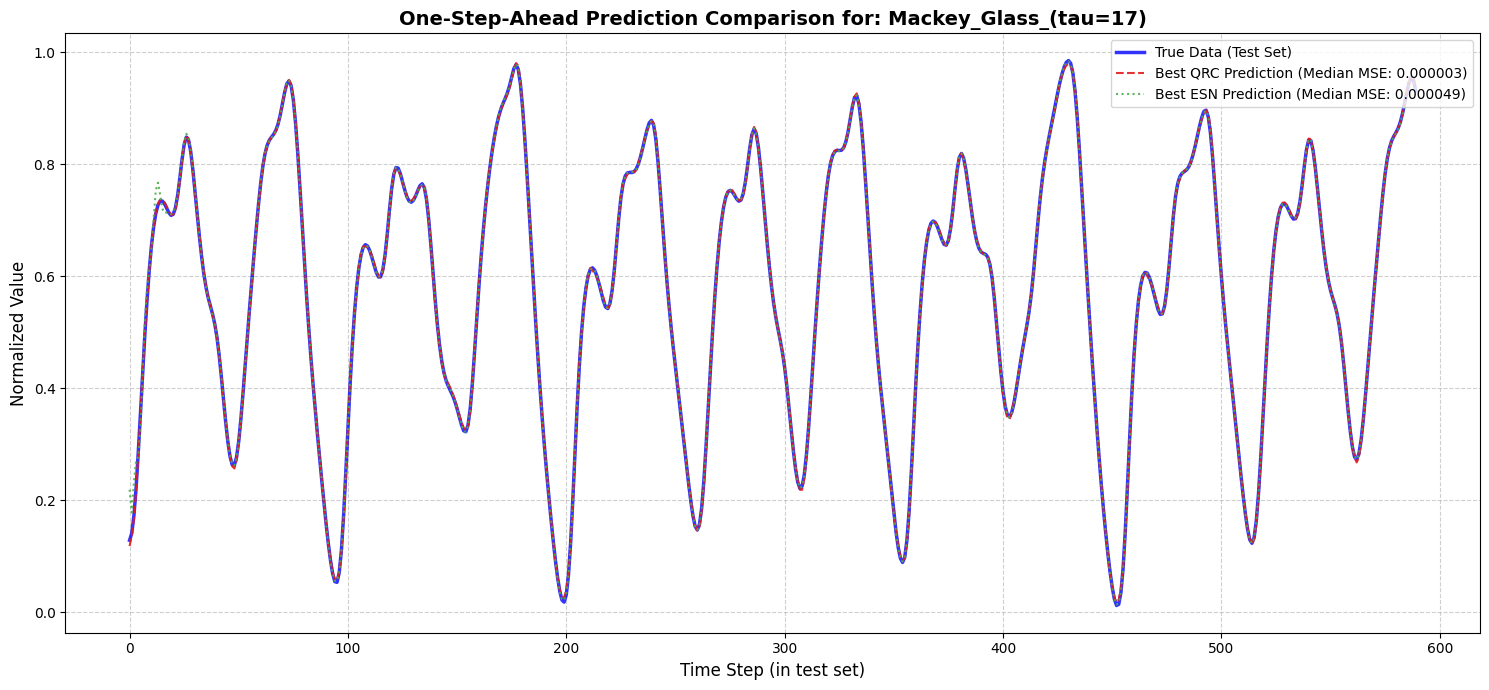


--- Generating plot for profile: Mackey_Glass_(tau=30) ---

Retraining best QRC model...
Best QRC Median MSE: 0.000010
Retraining best Classical ESN model...
Best Classical ESN Median MSE: 0.000009


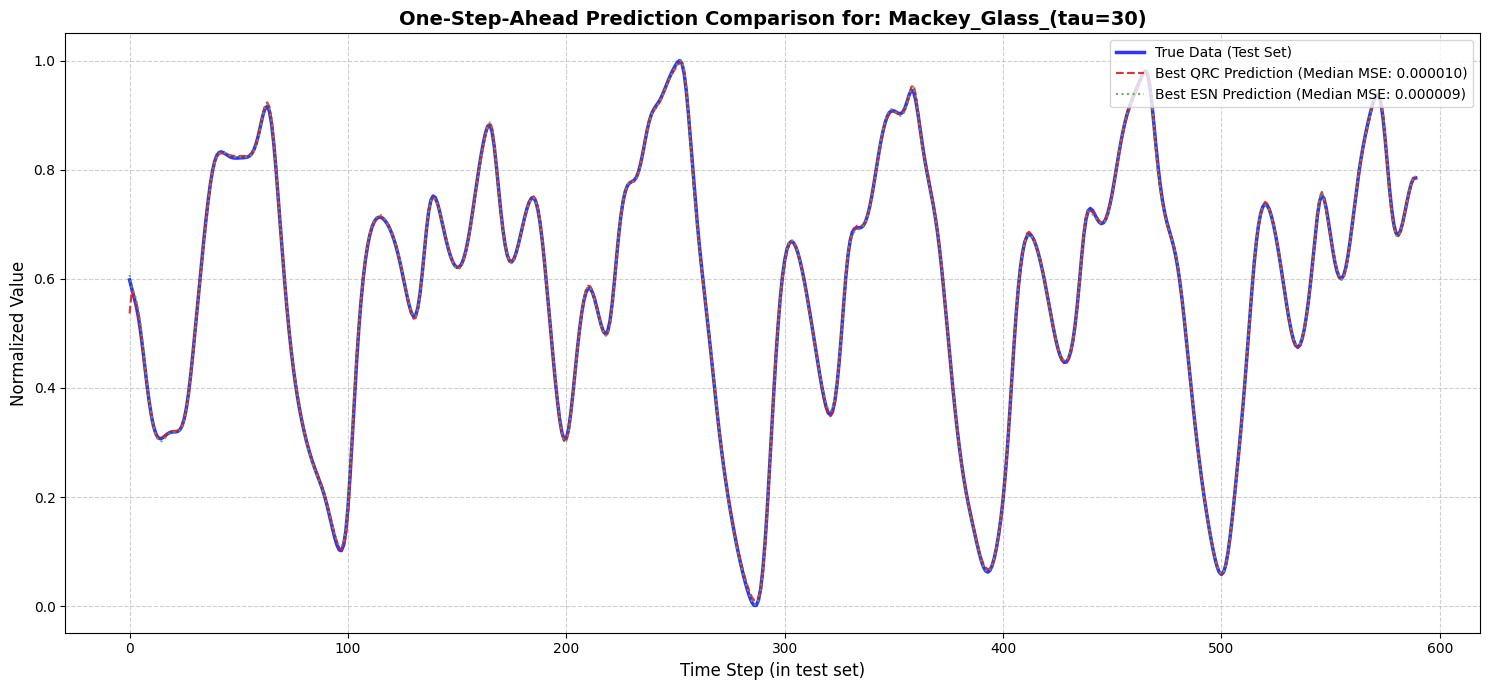


--- Generating plot for profile: Mackey_Glass_(tau=100) ---

Retraining best QRC model...
Best QRC Median MSE: 0.000021
Retraining best Classical ESN model...
Best Classical ESN Median MSE: 0.000014


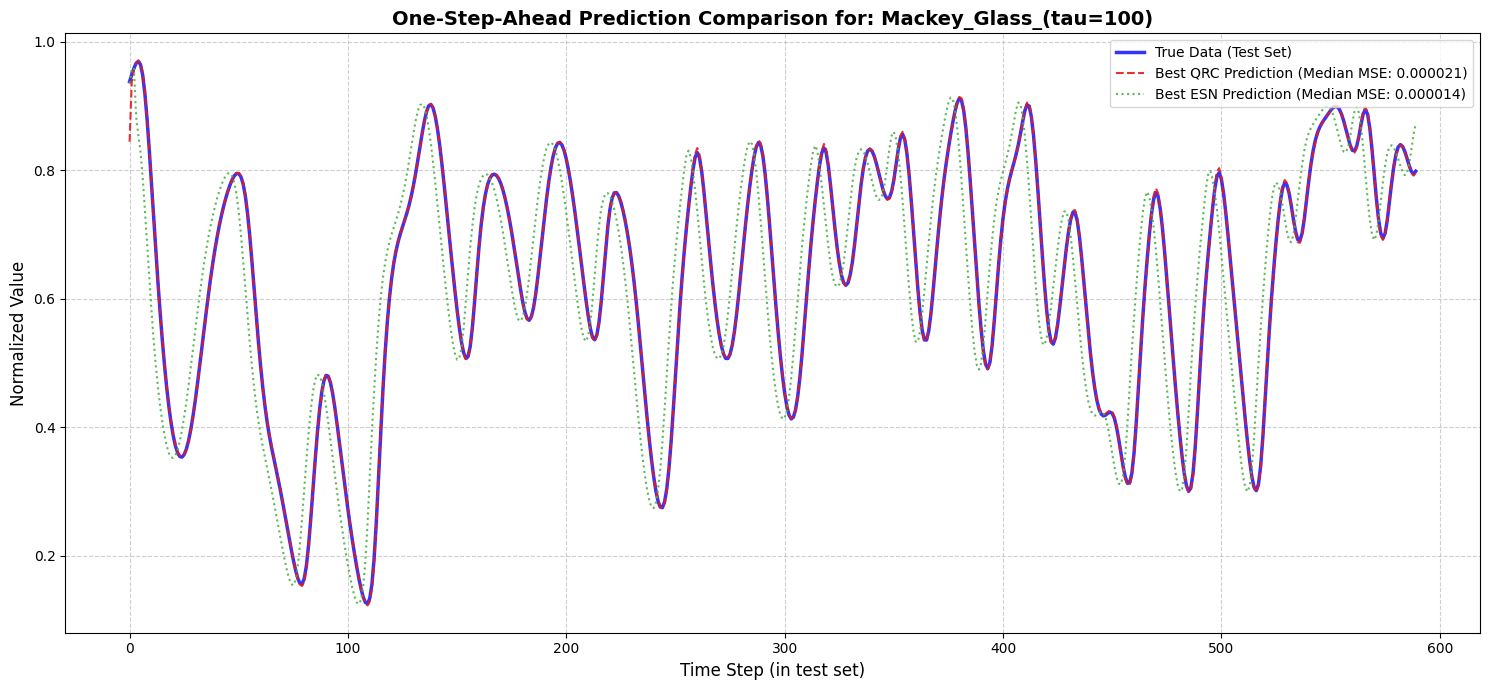


--- Generating plot for profile: ARMA_1_2_stochastic ---

Retraining best QRC model...
Best QRC Median MSE: 0.007727
Retraining best Classical ESN model...
Best Classical ESN Median MSE: 0.008000


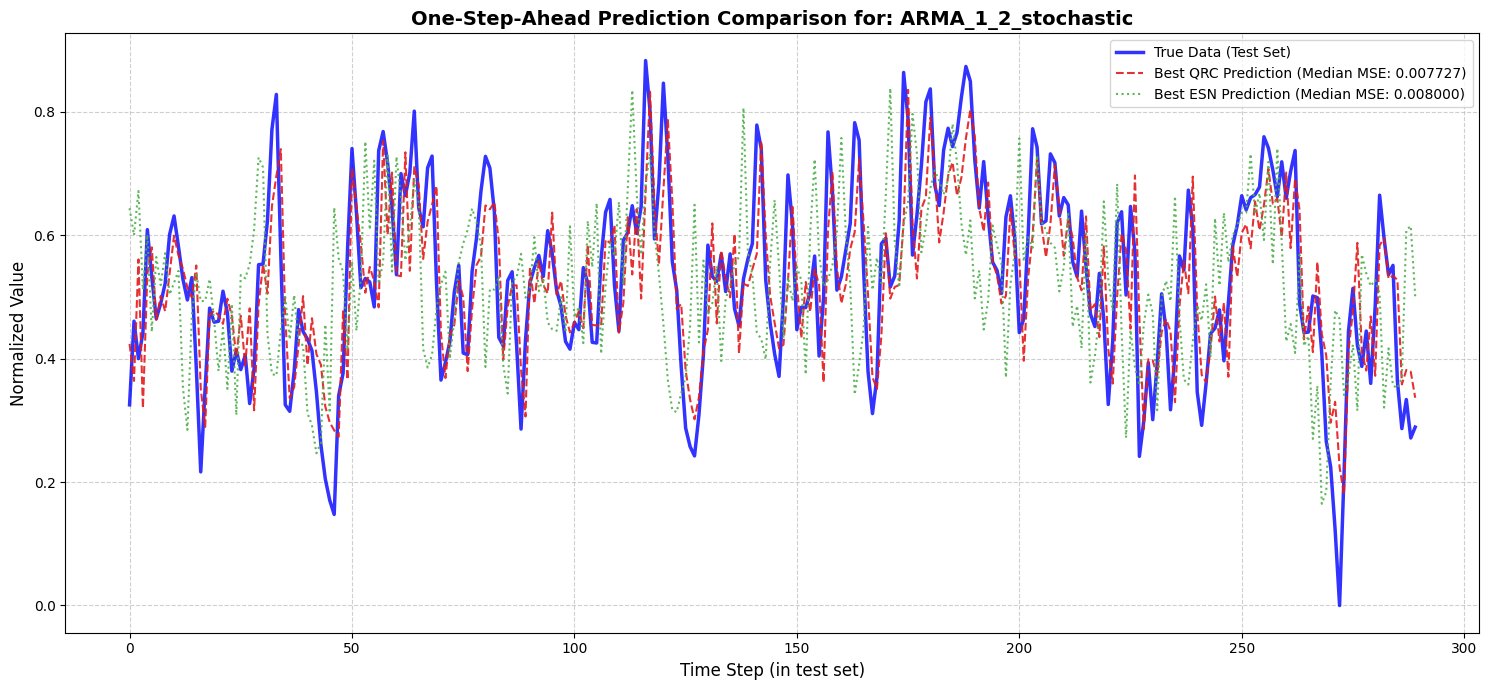


--- Generating plot for profile: NARMA10_Chaotic ---

Retraining best QRC model...
Best QRC Median MSE: 0.008780
Retraining best Classical ESN model...
Best Classical ESN Median MSE: 0.007720


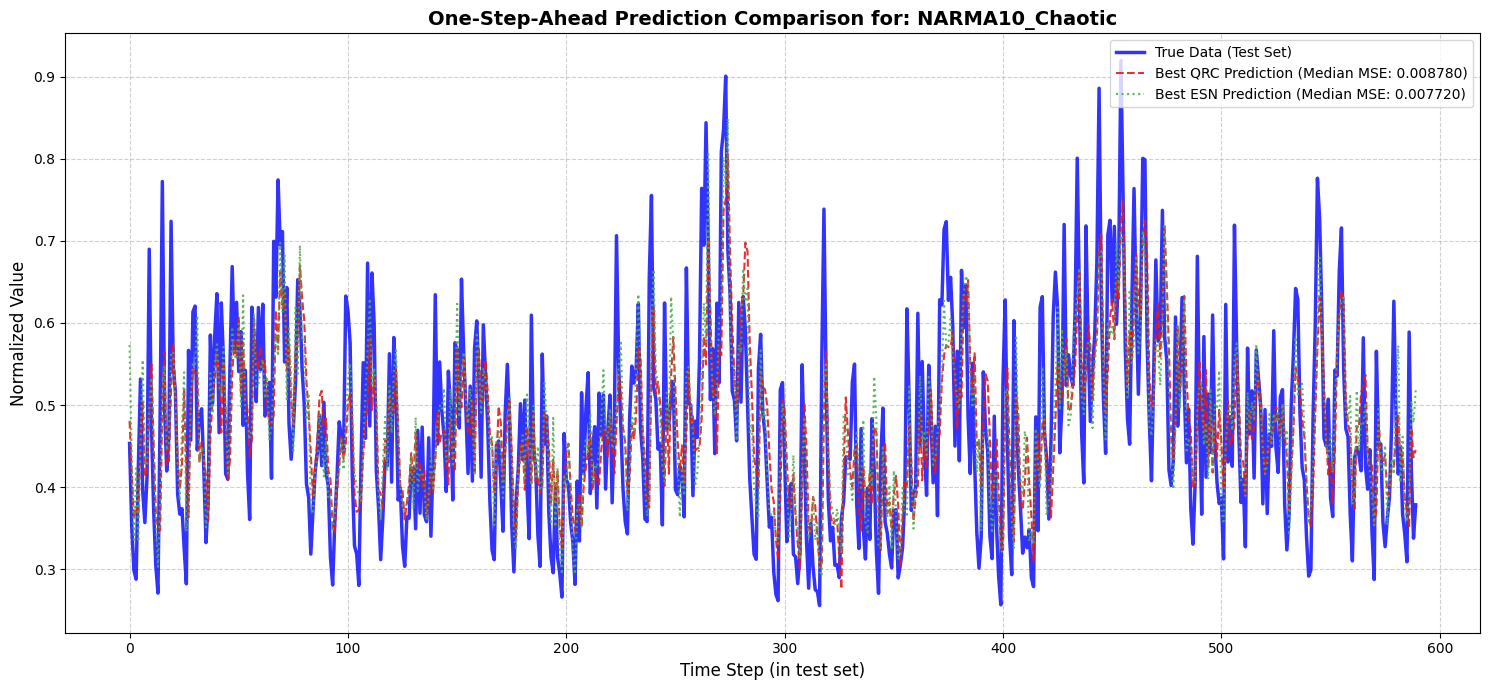


--- Generating plot for profile: NARMA5_Chaotic ---

Retraining best QRC model...
Best QRC Median MSE: 0.012532
Retraining best Classical ESN model...
Best Classical ESN Median MSE: 0.012058


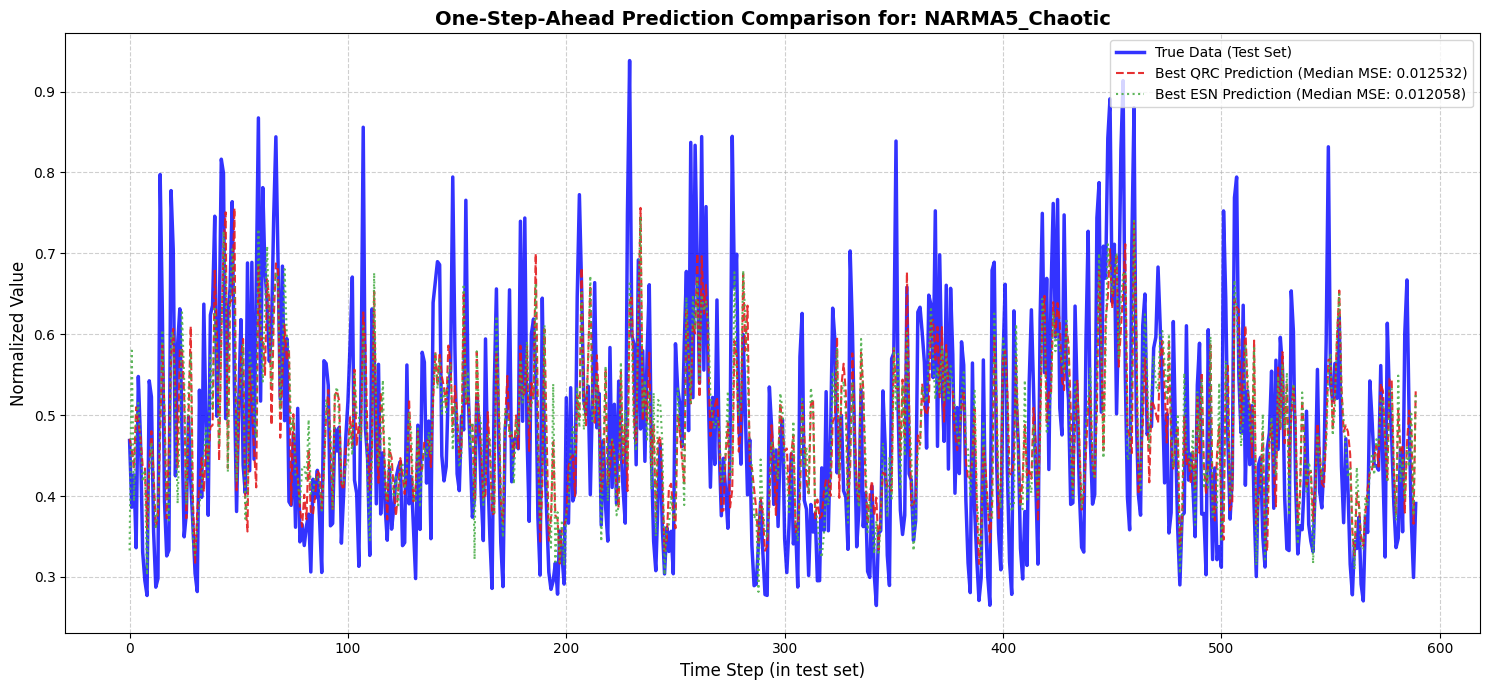

In [21]:
# === VISUALIZE BEST MODEL PERFORMANCE ===

# This cell iterates through each data profile, finds the best performing
# models, and uses the dedicated plotting function from src/visualization.py
# to generate and display a comparative plot.

# Define constants needed for data regeneration
constants = {
    'TRAIN_FRACTION': 0.7,
    'SEED': 2025
}

# Define the data profiles again so the visualization module can access them
# This should match the configuration in the experiment runner notebook
data_profiles_config = [
    {'name': 'Mackey_Glass_(tau=17)', 'generator': mackey_glass, 'params': {'tau': 17}},
    {'name': 'Mackey_Glass_(tau=30)', 'generator': mackey_glass, 'params': {'tau': 30}},
    {'name': 'Mackey_Glass_(tau=100)', 'generator': mackey_glass, 'params': {'tau': 100}},
    {'name': 'ARMA_1_2_stochastic', 'generator': generate_arma_data, 'params': {}},
    {'name': 'NARMA10_Chaotic', 'generator': generate_narma_data, 'params': {'order': 10}},
    {'name': 'NARMA5_Chaotic', 'generator': generate_narma_data, 'params': {'order': 5}}
]


if not results_df.empty:
    for profile_config in data_profiles_config:
        profile_name = profile_config['name']
        
        # Filter results for the current profile
        profile_df = results_df[results_df['data_profile'] == profile_name]
        
        # CORRECTED: Using 'median_mse'
        qrc_df = profile_df[profile_df['model_type'] == 'QRC'].dropna(subset=['median_mse'])
        classical_df = profile_df[profile_df['model_type'] == 'Classical_ESN'].dropna(subset=['median_mse'])

        if qrc_df.empty or classical_df.empty:
            print(f"\n--> SKIPPING PLOT for '{profile_name}' due to missing results.")
            continue
        
        # CORRECTED: Using 'median_mse' to find the best models
        best_qrc_row = qrc_df.loc[qrc_df['median_mse'].idxmin()]
        best_classical_row = classical_df.loc[classical_df['median_mse'].idxmin()]
        
        # Call the plotting function
        plot_best_model_comparison(best_qrc_row, best_classical_row, profile_config, constants)
else:
    print("Results DataFrame is empty. Cannot generate plots.")